# Regression 연습1 : Boston House Price

#### 머신러닝 코드 구조 <br>

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")



## 00 환경준비

### 01.Import

In [1]:
#라이브러리들을 불러오자.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### 02.Data Loading

In [2]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(data_path)

* data set 설명


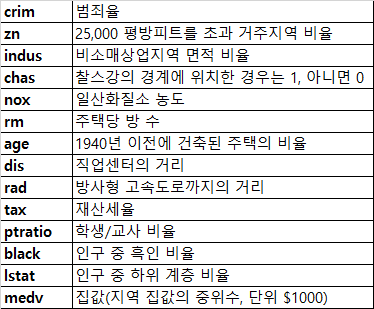


* medv : target
* chas : 범주형.(그러나 이미 1,0이므로 더미변수로 만들 필요 없음)

## 10.데이터 이해

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 11.둘러보기

In [4]:
# 상/하위 몇개 행을 살펴 봅시다.

data.head()
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
# 각 칼럼의 타입을 살펴 봅시다.

data.dtypes



crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [6]:
# 행, 열의 개수를 살펴 봅시다.
data.shape


(506, 14)

### 12.기초통계량

In [8]:
# 숫자형 변수들의 통계량을 살펴 봅니다.
data.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# 각 변수별 NaN 현황 파악하기
data.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### 13.탐색하기

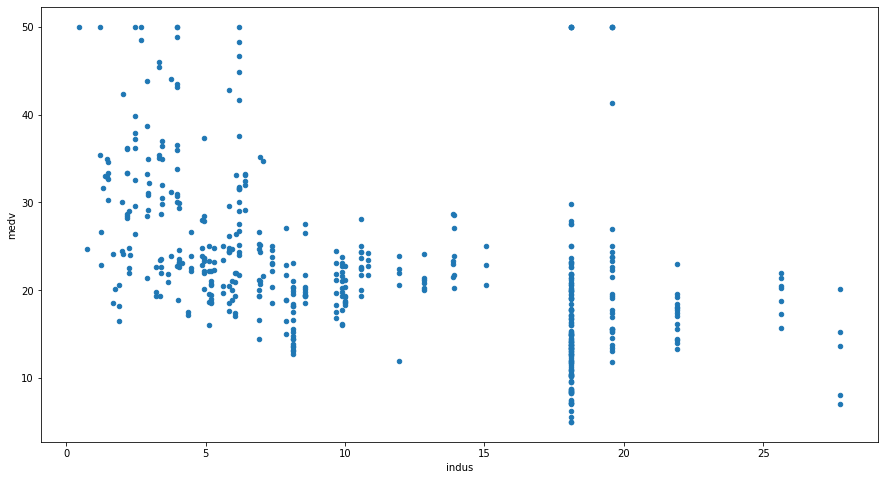

In [11]:
# indus와 medv의 관계를 산점도로 그려봅시다.
# 비소매상업지역 면적
data.plot(kind = 'scatter', x='indus', y='medv', figsize = (15,8))


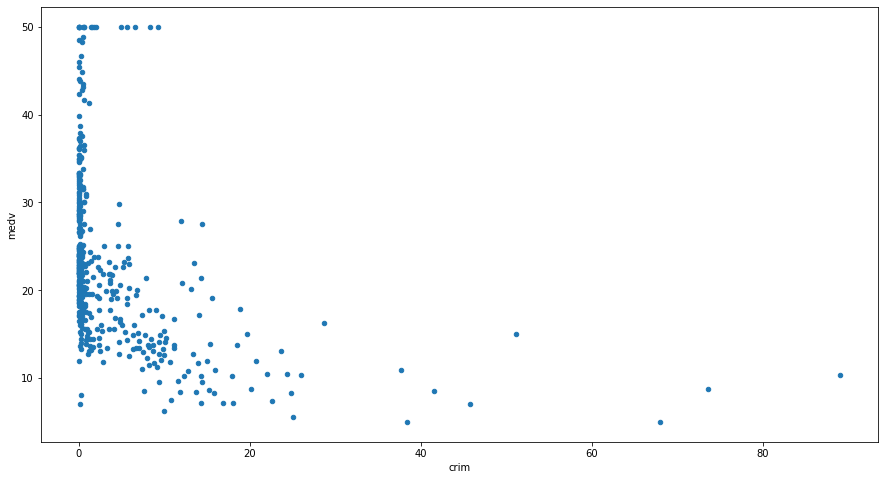

In [12]:
# crim과 medv의 관계를 산점도로 그려봅시다.
# 범죄율
data.plot(kind = 'scatter', x='crim', y='medv', figsize = (15,8))


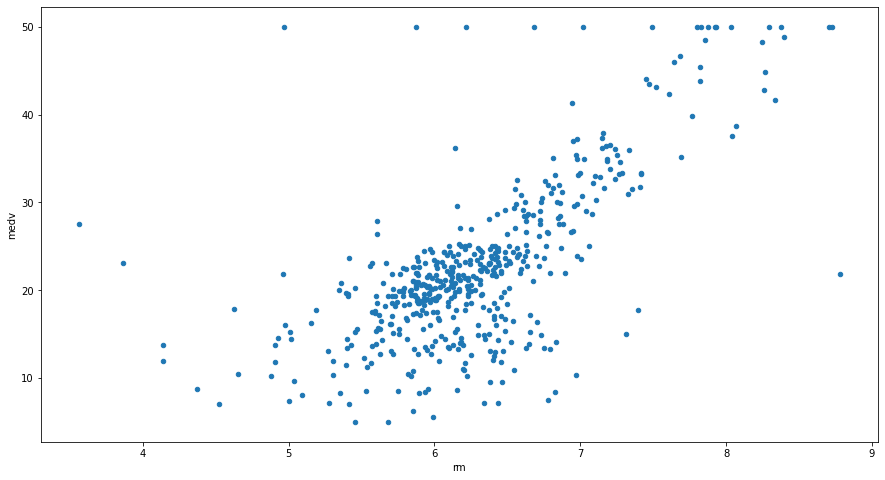

In [13]:
# 위 두 변수 이외에도 2개 정도를 더 살펴봅시다.
# 방수
data.plot(kind = 'scatter', x='rm', y='medv', figsize = (15,8))


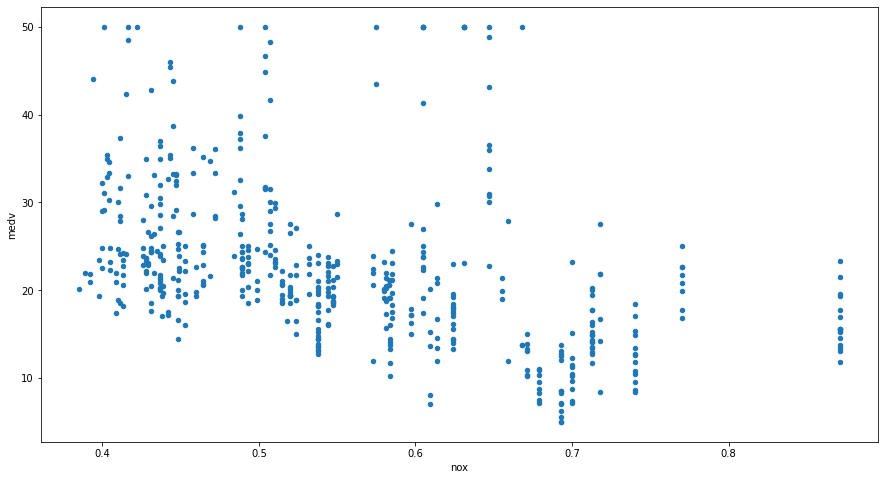

In [14]:
# 일산화질소 농도
data.plot(kind = 'scatter', x='nox', y='medv', figsize = (15,8))


## 20.데이터 준비

![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 21.변수 정리

### 22.NA 처리

### 23.Feature Engineering

### 24.Dummy Variable


익혀야 할 방법들
pd.get_dummies, pd.concat, (Pandas Dataframe).drop

### 25.Data Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = data.drop('medv', axis = 1)
y = data.loc[:,'medv']

In [62]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.2, random_state = 1234)

### 26.Scaling features




In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

### 27.Dataframe to Numpy array

## 30.모델링

# ![이미지](https://github.com/DA4BAM/dataset/blob/master/new_code.png?raw=true "code step1")

### 선형회귀분석으로 모델링을 수행해 봅시다.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
model_lm = LinearRegression()
model_lm.fit(train_x, train_y)
test_pred_lm = model_lm.predict(test_x)

### knn으로 모델링을 수행해 봅시다.

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
model_knn = KNeighborsRegressor()
model_knn.fit(train_x, train_y)
test_pred_knn = model_knn.predict(test_x)

In [70]:
for k in range(3,21) :
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(train_x, train_y)
    test_pred_knn = model_knn.predict(test_x)
    print('k : {}, RMSE : {}'.format(k,mean_squared_error(test_y, test_pred_knn, squared=0).round(3)))

k : 3, RMSE : 4.669
k : 4, RMSE : 5.328
k : 5, RMSE : 5.345
k : 6, RMSE : 5.252
k : 7, RMSE : 5.349
k : 8, RMSE : 5.467
k : 9, RMSE : 5.467
k : 10, RMSE : 5.603
k : 11, RMSE : 5.72
k : 12, RMSE : 5.788
k : 13, RMSE : 5.818
k : 14, RMSE : 5.943
k : 15, RMSE : 5.985
k : 16, RMSE : 6.006
k : 17, RMSE : 6.094
k : 18, RMSE : 6.104
k : 19, RMSE : 6.159
k : 20, RMSE : 6.18


In [71]:
# k가 6일때 오차가 가장 낮음
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(train_x, train_y)
test_pred_knn = model_knn.predict(test_x)

### 선형회귀분석과 knn 결과를 비교해 봅시다.

In [68]:
# MAPE 함수 만들기
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [72]:
print('LM RMSE : {}'.format(mean_squared_error(test_y, test_pred_lm, squared=0).round(3)))
print('KNN RMSE : {}'.format(mean_squared_error(test_y, test_pred_knn, squared=0).round(3)))
print('---------------------------')
print('LM MAPE : {}'.format(mean_absolute_percentage_error(test_y, test_pred_lm).round(3)))
print('KNN MAPE : {}'.format(mean_absolute_percentage_error(test_y, test_pred_knn).round(3)))



LM RMSE : 4.895
KNN RMSE : 4.669
---------------------------
LM MAPE : 0.169
KNN MAPE : 0.171


In [73]:
# 실제값, 선형회귀 예측값, KNN 예측값을 눈으로 봅시다.
result = {'y':test_y, 'y_lm':test_pred_lm.round(1), 'y_knn':test_pred_knn.round(1)}

pd.DataFrame(result)

,y,y_lm,y_knn
64,33.0,21.3,28.6
100,27.5,23.9,22.0
400,5.6,12.3,11.3
485,21.2,22.1,21.0
454,14.9,14.2,12.4
...,...,...,...
350,22.9,19.2,24.6
191,30.5,30.0,33.9
239,23.3,28.1,22.6
109,19.4,19.5,19.9
